In [1]:
# 사용 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/My Drive/연구실용/" # korea drive
path2 = "/content/drive/My Drive/연구실/" 
path3 = path

In [ ]:
kospi = pd.read_csv(path2+"코스피주가지수.csv", encoding="cp949")
kospi.head()

,시점,KOSPI 200,동일가중지수
0,2012.02,4.0,3.4
1,2012.03,-0.2,-3.5
2,2012.04,-0.8,-6.0
3,2012.05,-7.7,-6.8
4,2012.06,0.3,2.9


In [ ]:
r1 = kospi["KOSPI 200"].values
rr1 = 1
rkospi = [1]
for i in r1:
  rr1 = rr1*(i+100)/100
  rkospi.append(rr1)
rkospi[-1]

1.5110091243175605

In [ ]:
# random
model = pd.read_csv(path2+"PCR_r2oos.csv", index_col=0)
ya0 = pd.Series(model['real'])
ya1 = pd.Series(model['predict'])
tk0 = pd.Series(model['ticker'])
ym0 = pd.Series(model['yearmonth'])

r1 = []
for i in list(dict.fromkeys(ym0)):
  t = ym0==i
  d = round(len(ya0[t])/10)
  r1.append(ya0[t].sample(n=d, random_state=511).mean())

rr1 = 1
rrandom = [1]
for i in r1:
  rr1 = rr1*(i+100)/100
  rrandom.append(rr1)
rrandom[-1]

3.148848244817647

In [7]:
def myfunc(filename, path1):
  model = pd.read_csv(path1+filename+'.csv', index_col=0)
  ya0 = pd.Series(model['real'])
  ya1 = pd.Series(model['predict'])
  tk0 = pd.Series(model['ticker'])
  ym0 = pd.Series(model['yearmonth'])

  r1 = []
  for i in list(dict.fromkeys(ym0))[36:]:
    t = ym0 ==i
    d = round(len(ya1[t])/10)
    sort = ya1[t].sort_values()
    r1.append(ya0[sort[-d:].index].mean())

  rr1 = 1
  rmodel = [1]
  for i in r1:
    rr1 = rr1*(i+100)/100
    rmodel.append(rr1)
  return rmodel 

In [5]:
def ramgefunc(filename):
  model = pd.read_csv(path2+filename+'.csv')
  rmodel = model["cum_y"].tolist()[36:]
  return rmodel

In [8]:
# OLS
rols = myfunc('OLS_value', path3)
rols[-1]

6.572678998626087

# R2oos, NDCG

In [9]:
# Elas
relas = ramgefunc('GLM_r2oos_portfolio')
relas[-1]

25.990623866338204

In [ ]:
relas = [1]+relas
relas[0]

1

In [10]:
# PLS
rpls = myfunc('PLS_r2oos', path2)
rpls[-1]

4.515221192995476

In [11]:
# PCR
rpcr = myfunc('PCR_r2oos', path2)
rpcr[-1]

2.8438633154243536

In [12]:
# GBRT
rgbrt = myfunc('GBRT_bayesian_r2oos', path)
rgbrt[-1]

6.756123692071461

In [13]:
# RF
rrf = myfunc('RF_bayesian_r2oos_last3', path)
rrf[-1]

7.6886794578766615

In [14]:
# LGBMRegressor
rlgbm = ramgefunc('LGBM_r2oos_portfolio')
rlgbm[-1]

46.76573672487591

In [ ]:
rlgbm = [1]+rlgbm
rlgbm[0]

1

In [15]:
# LGBMRanker
rrank = myfunc('LGBMRanker_c_timecv3_ndcgvarmultiple_bayseian', path2)
rrank[-1]

13.48813672783564

In [16]:
# NN1
rnn1 = myfunc('NN1_value', path3)
rnn1[-1]

9.224642233147852

In [ ]:
# # NN2
# rnn2 = myfunc('NN2_value', path3)
# rnn2[-1]

In [ ]:
# # NN3
# rnn3 = myfunc('NN3_value', path3)
# rnn3[-1]

In [ ]:
# # NN4
# rnn4 = myfunc('NN4_value', path3)
# rnn4[-1]

In [ ]:
# # NN5
# rnn5 = myfunc('NN5_value', path3)
# rnn5[-1]

# IRR

In [ ]:
# Elas
ielas = ramgefunc('GLM_irr_portfolio')
ielas[-1]

36.80082558973162

In [ ]:
ielas = [1]+ielas
ielas[0]

1

In [17]:
# PLS
ipls = myfunc('PLS_irr', path2)
ipls[-1]

8.923983722748964

In [18]:
# PCR
ipcr = myfunc('PCR_irr', path2)
ipcr[-1]

8.700013039326798

In [19]:
# GBRT
igbrt = myfunc('GBRT_bayesian', path)
igbrt[-1]

11.768223384442607

In [20]:
# RF
irf = myfunc('RF_bayesian', path)
irf[-1]

8.715434461871176

In [ ]:
# LGBMRegressor
ilgbm = ramgefunc('LGBM_irr_portfolio')
ilgbm[-1]

58.114884005687024

In [ ]:
ilgbm = [1]+ilgbm
ilgbm[0]

1

In [21]:
# LGBMRanker
irank = myfunc('LGBMRanker_c_timecv333_return_bayseian', path2)
irank[-1]

11.019793511650361

In [ ]:
# # NN1
# inn1 = myfunc('NN1_IRR_value', path3)
# inn1[-1]

In [22]:
# NN2
inn2 = myfunc('NN2_IRR_value', path3)
inn2[-1]

9.384023844362282

In [ ]:
# # NN3
# inn3 = myfunc('NN3_IRR_value', path3)
# inn3[-1]

In [ ]:
# # NN4
# inn4 = myfunc('NN4_IRR_value', path3)
# inn4[-1]

In [ ]:
# # NN5
# inn5 = myfunc('NN5_IRR_value', path3)
# inn5[-1]

# 그래프

In [23]:
ym0 = pd.read_csv(path+"GBRT_bayesian.csv")["yearmonth"]
yearmonth = list(dict.fromkeys(ym0))
yearmonth[-6:]

['2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11']

In [ ]:
len(yearmonth)

107

In [ ]:
len(relas)

108

In [24]:
yearmonth = yearmonth + ['2020-12']

In [ ]:
# import matplotlib.pyplot as plot

# plt.figure(figsize=(10, 6))
# plt.plot(yearmonth, relas, label="ENET")
# plt.plot(rpls, label="PLS")
# plt.plot(rpcr, label="PCR")
# plt.plot(rgbrt, label="GBRT")
# plt.plot(rrf, label="RF")
# plt.plot(rlgbm, label="LGBMReg")
# plt.plot(rrank, label="LGBMRank")
# # plt.plot(rnn1, label="NN1")
# plt.plot(rnn2, label="NN2")
# # plt.plot(rnn3, label="NN3")
# # plt.plot(rnn4, label="NN4")
# # plt.plot(rnn5, label="NN5")
# plt.plot(rkospi, label="KOSPI")
# plt.plot(rrandom, label="random")
# plt.grid(visible=True, linestyle="--")
# plt.legend()
# plt.xticks(range(0, 109, 12))
# # plt.yticks(range(5))
# plt.title("Cumulative return of machine learning portfolios (valid : r2oos)")
# plt.show()

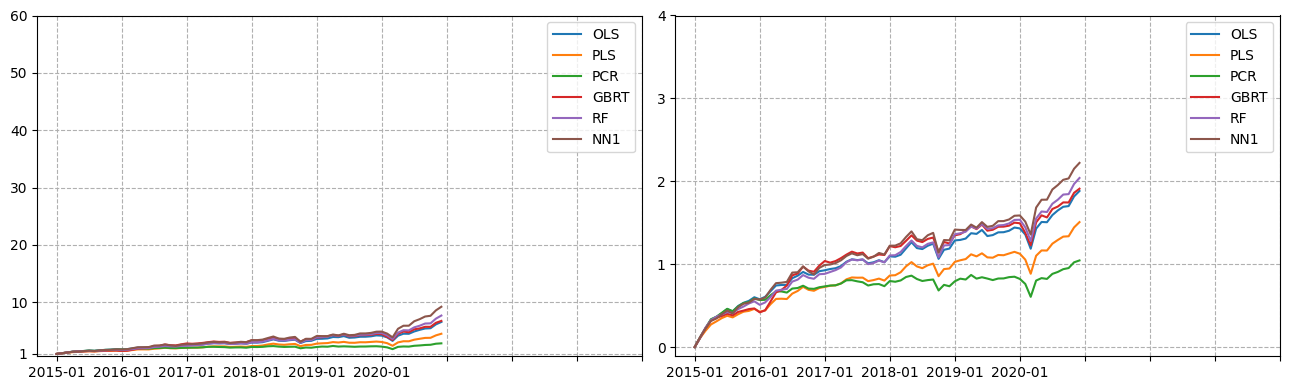

In [25]:
import matplotlib.pyplot as plot
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
# plt.plot(yearmonth[36:], relas, label="ENET")
plt.plot(yearmonth[36:], rols, label="OLS")
plt.plot(rpls, label="PLS")
plt.plot(rpcr, label="PCR")
plt.plot(rgbrt, label="GBRT")
plt.plot(rrf, label="RF")
#plt.plot(rlgbm, label="LGBMReg")
# plt.plot(rrank, label="LGBMRank")
plt.plot(rnn1, label="NN1")
# plt.plot(rnn2, label="NN2")
# plt.plot(rnn3, label="NN3")
# plt.plot(rnn4, label="NN4")
# plt.plot(rnn5, label="NN5")
#plt.plot(rkospi, label="KOSPI 200", c="k")
#plt.plot(rrandom, label="random")
plt.grid(visible=True, linestyle="--")
plt.legend()
plt.xticks(range(0, 109, 12))
# plt.xticks(rotation=45)
plt.yticks([1, 10, 20, 30, 40, 50, 60])
# plt.title("Cumulative return of top 10% portfolios (valid : r2oos)")

plt.subplot(1, 2, 2)
# plt.plot(yearmonth, np.log(relas), label="ENET")
plt.plot(yearmonth[36:], np.log(rols), label="OLS")
plt.plot(np.log(rpls), label="PLS")
plt.plot(np.log(rpcr), label="PCR")
plt.plot(np.log(rgbrt), label="GBRT")
plt.plot(np.log(rrf), label="RF")
# plt.plot(np.log(rlgbm), label="LGBMReg")
# plt.plot(np.log(rrank), label="LGBMRank")
plt.plot(np.log(rnn1), label="NN1")
# plt.plot(np.log(rnn2), label="NN2")
# plt.plot(np.log(rnn3), label="NN3")
# plt.plot(np.log(rnn4), label="NN4")
# plt.plot(np.log(rnn5), label="NN5")
#plt.plot(np.log(rkospi), label="KOSPI 200", c="k")
#plt.plot(np.log(rrandom), label="random")
plt.grid(visible=True, linestyle="--")
plt.legend()
plt.xticks(range(0, 109, 12))
plt.yticks(range(5))
# plt.xticks(rotation=45)

# plt.suptitle("Cumulative Return of a Portfolio with top 10% predicted return (valid : r2oos)", fontsize=16)

plt.tight_layout()
# plt.savefig(path+'image 모음/portfolio_graph_r2oos.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

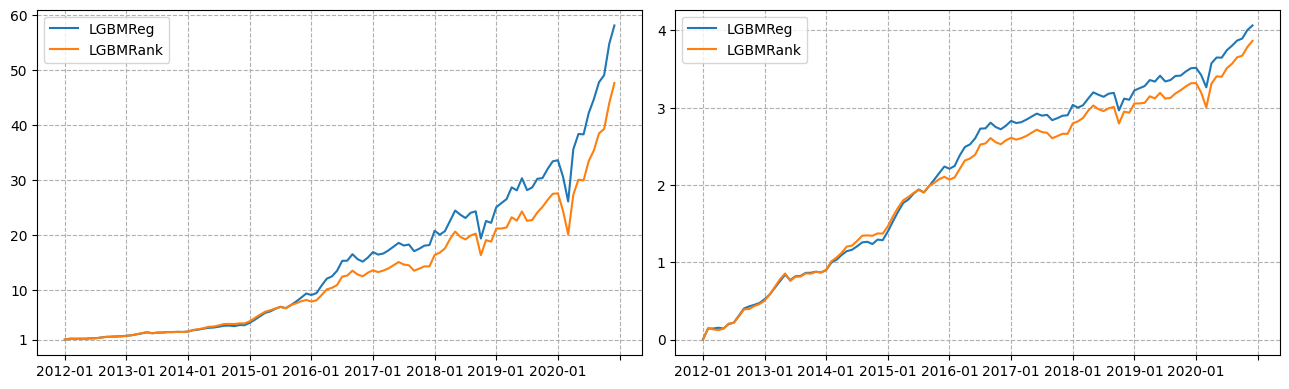

In [ ]:
# plt.figure(figsize=(13, 4))

# plt.subplot(1, 2, 1)
# plt.plot(yearmonth, ilgbm, label="LGBMReg")
# plt.plot(irank, label="LGBMRank")
# plt.grid(visible=True, linestyle="--")
# # plt.title("Cumulative return of machine learning portfolios (valid : CRP10)")
# plt.xticks(range(0, 109, 12))
# plt.yticks([1, 10, 20, 30, 40, 50, 60])
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(yearmonth, np.log(ilgbm), label="LGBMReg")
# plt.plot(np.log(irank), label="LGBMRank")
# plt.grid(visible=True, linestyle="--")
# # plt.suptitle("Cumulative Return of a Portfolio with top 10% predicted return by LGBM Regressor & Ranker (valid : CRP10)")
# plt.xticks(range(0, 109, 12))
# plt.yticks(range(5))
# plt.legend()

# plt.tight_layout()
# plt.savefig(path+'image 모음/portfolio_graph_lgbm.png', bbox_inches='tight', pad_inches=0.1)
# plt.show()

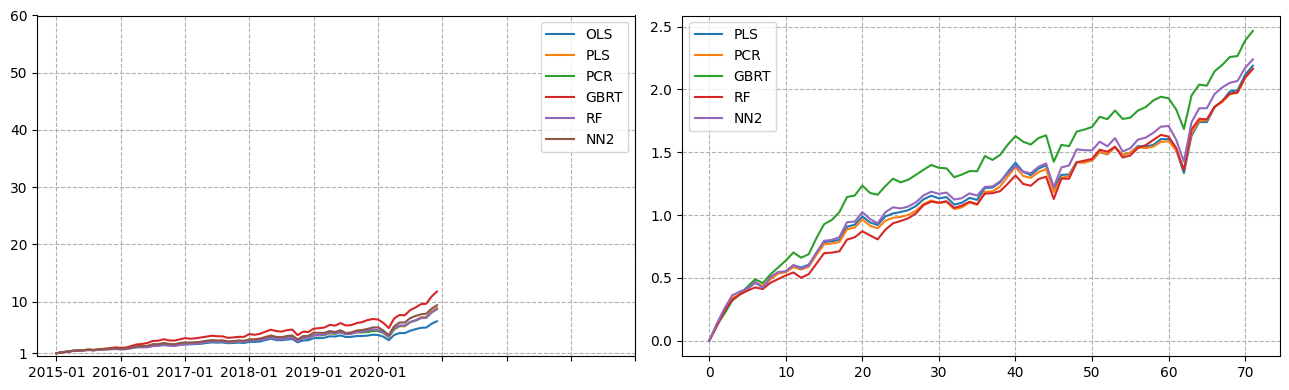

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
# plt.plot(yearmonth[36:], ielas, label="ENET")
plt.plot(yearmonth[36:], rols, label="OLS")
plt.plot(ipls, label="PLS")
plt.plot(ipcr, label="PCR")
plt.plot(igbrt, label="GBRT")
plt.plot(irf, label="RF")
# plt.plot(ilgbm, label="LGBMReg")
# plt.plot(irank, label="LGBMRank")
# plt.plot(inn1, label="NN1")
plt.plot(inn2, label="NN2")
# plt.plot(inn3, label="NN3")
# plt.plot(inn4, label="NN4")
# plt.plot(inn5, label="NN5")
#plt.plot(rkospi, label="KOSPI 200", c="k")
#plt.plot(rrandom, label="random")
plt.grid(visible=True, linestyle="--")
# plt.title("Cumulative return of machine learning portfolios (valid : CRP10)")
plt.xticks(range(0, 109, 12))
plt.yticks([1, 10, 20, 30, 40, 50, 60])
plt.legend()

plt.subplot(1, 2, 2)
# plt.plot(yearmonth, np.log(ielas), label="ENET")
plt.plot(np.log(ipls), label="PLS")
plt.plot(np.log(ipcr), label="PCR")
plt.plot(np.log(igbrt), label="GBRT")
plt.plot(np.log(irf), label="RF")
# plt.plot(np.log(ilgbm), label="LGBMReg")
# plt.plot(np.log(irank), label="LGBMRank")
# plt.plot(np.log(inn1), label="NN1")
plt.plot(np.log(inn2), label="NN2")
# plt.plot(np.log(inn3), label="NN3")
# plt.plot(np.log(inn4), label="NN4")
# plt.plot(np.log(inn5), label="NN5")
#plt.plot(np.log(rkospi), label="KOSPI 200", c="k")
#plt.plot(np.log(rrandom), label="random")
plt.grid(visible=True, linestyle="--")
# plt.suptitle("Cumulative Return of a Portfolio with top 10% predicted return (valid : CRP10)")
#plt.xticks(range(0, 109, 12))
# plt.yticks(range(5))
plt.legend()

plt.tight_layout()
#plt.savefig(path+'image 모음/portfolio_graph_CRP10.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 6))

# plt.plot(yearmonth, np.log(ielas), label="ENET")
# plt.plot(np.log(ipls), label="PLS")
# plt.plot(np.log(ipcr), label="PCR")
# plt.plot(np.log(igbrt), label="GBRT")
# plt.plot(np.log(irf), label="RF")
# plt.plot(np.log(ilgbm), label="LGBMReg")
# plt.plot(np.log(irank), label="LGBMRank")
# plt.plot(np.log(rkospi), label="KOSPI")
# plt.plot(np.log(rrandom), label="random")
# plt.grid(visible=True, linestyle="--")
# plt.title("Log cumulative return of machine learning portfolios (valid : IRR)")
# plt.xticks(range(0, 109, 12))
# # plt.yticks(range(5))
# plt.legend()
# plt.show()